### レポート2解答例

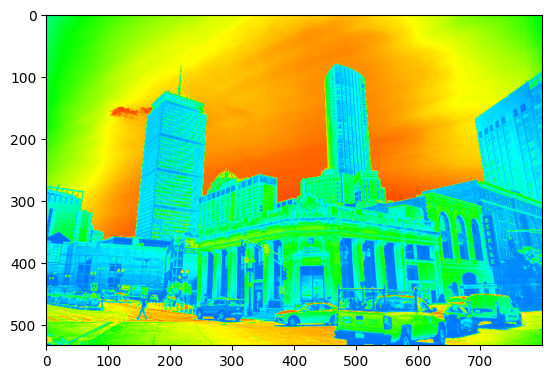

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread('gray-boston.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR → RGB

# 一旦，画素値をすべてコピーする
after_image = image.copy()

# ルックアップテーブルを作成する
before_pixel_value = np.arange(256)

# 赤を折れ線トーングラフ
a = 128
b = 192
after_pixel_value = 255 * (before_pixel_value - a) / (b - a)
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)
# 赤の画素値変換を行う
after_image[:, :, 0] = cv2.LUT(image[:, :, 0], after_pixel_value)

# 緑を台形トーンカーブ
a = 64
b = 192

# Step1
after_pixel_value1 = 255 / a * before_pixel_value
after_pixel_value1 = np.clip(after_pixel_value1, 0, 255)
after_pixel_value1 = after_pixel_value1.astype(np.uint8)

# Step2
after_pixel_value2 = np.where((before_pixel_value >= a) & (before_pixel_value <= b), 255, 0)
after_pixel_value2 = after_pixel_value2.astype(np.uint8)

# Step3
after_pixel_value3 = -255 / (255 - b) * before_pixel_value + 255 * 255 / (255 - b)
after_pixel_value3 = np.clip(after_pixel_value3, 0, 255)
after_pixel_value3 = after_pixel_value3.astype(np.uint8)

# Step4
after_pixel_value = np.append(after_pixel_value1[0:a], after_pixel_value2[a:b])
after_pixel_value = np.append(after_pixel_value, after_pixel_value3[b:256])

# 緑の画素値変換を行う
after_image[:, :, 1] = cv2.LUT(image[:, :, 0], after_pixel_value)

# 青を折れ線トーングラフ（逆順）
a = 64
b = 128
c = 255 - b
d = 255 - a

before_pixel_value = np.arange(256)
after_pixel_value = 255 * (before_pixel_value - c) / (d - c)
after_pixel_value = np.clip(after_pixel_value, 0, 255)
after_pixel_value = after_pixel_value.astype(np.uint8)
after_pixel_value = after_pixel_value[::-1] # [::-1]をすることで逆順にする

# 青の画素値変換を行う
after_image[:, :, 2] = cv2.LUT(image[:, :, 2], after_pixel_value)

# 画像表示
plt.imshow(after_image)
plt.show()